<H1 style="color:lime;">TECNICHE DI INTELLIGENZA AI</H1>
<P style="color:lime;">CORSO DI INTELLIGENZA RETE NEURALE</P>
<P style="color:lime;">SALVATORE BREZZA</P>

In [15]:
'''
    LEZIONE DI RETE NEURALE 
    FAWARD_PROPAGATION , RETRO PROPAGATION , BACKPROPAGATION , SALVATAGGIO PESI E BIAS 
'''

'\n    LEZIONE DI RETE NEURALE \n    FAWARD_PROPAGATION , RETRO PROPAGATION , BACKPROPAGATION , SALVATAGGIO PESI E BIAS \n'

In [16]:
import random
import pickle
import os
import math
import matplotlib.pyplot as plt
# =========================
# PARAMETRI
# =========================
rate = 0.7
neuroni = 2
temperatura = [20, 30, 50, 100]
umidita = [19, 20, 40, 60]
epoca = 10

target_temp = 1
target_umidita = 1

# Normalizzazione input
temperatura_norm = [t / 100 for t in temperatura]
umidita_norm = [u / 100 for u in umidita]

# Funzioni Sigmoid
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

# =========================
# CARICAMENTO RETE E DATI
# =========================
if os.path.exists("rete_salvata.pkl"):
    with open("rete_salvata.pkl", "rb") as f:
        dati = pickle.load(f)
        if 'pesi' in dati and 'bias' in dati:  # Controllo per i pesi e bias
            pesi = dati["pesi"]
            bias = dati["bias"]
        else:
            pesi = [random.uniform(0, 0.1) for _ in range(neuroni)]
            bias = [random.uniform(0, 0.2) for _ in range(neuroni)]
        
        # Se i dati di temperatura e umidità sono mancanti, li aggiungiamo
        if 'temperatura' not in dati or 'umidita' not in dati:
            temperatura_norm = [t / 100 for t in temperatura]
            umidita_norm = [u / 100 for u in umidita]
        
    print("Rete e dati caricati dai dati salvati.")
else:
    # Se il file non esiste, inizializza tutto
    pesi = [random.uniform(0, 0.1) for _ in range(neuroni)]
    bias = [random.uniform(0, 0.2) for _ in range(neuroni)]
    temperatura_norm = [t / 100 for t in temperatura]
    umidita_norm = [u / 100 for u in umidita]
    print("Nuova rete inizializzata.")

# =========================
# ADDDESTRAMENTO
# =========================
modalita = input("Modalità (train/inferenza): ").strip().lower()

if modalita == "train":
    for ep in range(epoca):
        print(f"\n--- Epoca {ep+1} ---")
        for n in range(neuroni):
            # Temperatura
            for temp_norm in temperatura_norm:
                z1 = pesi[n] * temp_norm + bias[n]
                a1 = sigmoid(z1)
                errore_temp = target_temp - a1
                delta_temp = errore_temp * sigmoid_deriv(z1)
                pesi[n] += rate * delta_temp * temp_norm
                bias[n] += rate * delta_temp
                print(f"Temp={temp_norm:.2f}, Errore={errore_temp:.3f}")

            # Umidità
            for umid_norm in umidita_norm:
                z2 = pesi[n] * umid_norm + bias[n]
                a2 = sigmoid(z2)
                errore_umidita = target_umidita - a2
                delta_umidita = errore_umidita * sigmoid_deriv(z2)
                pesi[n] += rate * delta_umidita * umid_norm
                bias[n] += rate * delta_umidita
                print(f"Umidita={umid_norm:.2f}, Errore={errore_umidita:.3f}")

    # Salvataggio completo (pesi, bias e dati)
    with open("rete_salvata.pkl", "wb") as f:
        pickle.dump({
            "pesi": pesi,
            "bias": bias,
            "temperatura": temperatura_norm,
            "umidita": umidita_norm
        }, f)
    print("\nRete e dati salvati su file!")

elif modalita == "inferenza":
    print("\n--- Inferenza ---")
    for n in range(neuroni):
        for i, temp_norm in enumerate(temperatura_norm):
            z1 = pesi[n] * temp_norm + bias[n]
            a1 = sigmoid(z1)
            output_temp = a1 * 100  # scala a °C
            print(f"Temp={temperatura[i]}°C, Output={output_temp:.2f}")

        for i, umid_norm in enumerate(umidita_norm):
            z2 = pesi[n] * umid_norm + bias[n]
            a2 = sigmoid(z2)
            output_umid = a2 * 100  # scala a %
            print(f"Umidita={umidita[i]}%, Output={output_umid:.2f}")

else:
    print("Modalità non valida! Inserisci 'train' o 'inferenza'.")





Rete e dati caricati dai dati salvati.


Modalità (train/inferenza):  inferenza



--- Inferenza ---
Temp=20°C, Output=96.53
Temp=30°C, Output=96.91
Temp=50°C, Output=97.56
Temp=100°C, Output=98.65
Umidita=19%, Output=96.49
Umidita=20%, Output=96.53
Umidita=40%, Output=97.25
Umidita=60%, Output=97.83
Temp=20°C, Output=96.58
Temp=30°C, Output=96.92
Temp=50°C, Output=97.52
Temp=100°C, Output=98.56
Umidita=19%, Output=96.54
Umidita=20%, Output=96.58
Umidita=40%, Output=97.24
Umidita=60%, Output=97.78


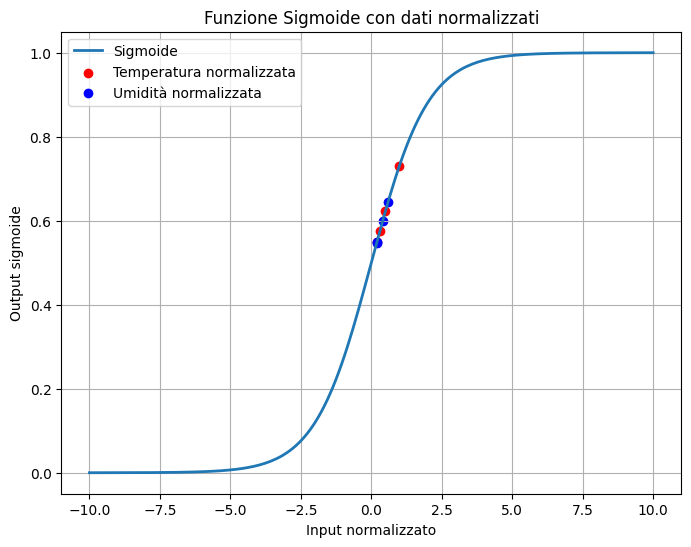

In [14]:
# =========================
# GRAFICO SIGMOIDE + DATI
# =========================
import numpy as np

# Generiamo valori continui per la curva
x = np.linspace(-10, 10, 200)
y = [sigmoid(val) for val in x]

# Output sigmoide dei tuoi dati normalizzati
y_temp = [sigmoid(t) for t in temperatura_norm]
y_umid = [sigmoid(u) for u in umidita_norm]

# Grafico
plt.figure(figsize=(8,6))
plt.plot(x, y, label="Sigmoide", linewidth=2)
plt.scatter(temperatura_norm, y_temp, color="red", label="Temperatura normalizzata")
plt.scatter(umidita_norm, y_umid, color="blue", label="Umidità normalizzata")
plt.title("Funzione Sigmoide con dati normalizzati")
plt.xlabel("Input normalizzato")
plt.ylabel("Output sigmoide")
plt.grid(True)
plt.legend()
plt.show()
